# 概要

このノートブックでは完成したVitの学習済みモデルを用いて”推論”および”ビジュアライズ”を目的とする。

Vit_pytorchで学習済みモデルが吐き出されている前提となる。

## ライブラリのインストール

In [ ]:
!pip install vit_pytorch timm vision_transformer_pytorch

## MURAのデータセットから構成をVit用に配置し直したものをダウンロードする。

ダウンロードはこちらから

- [trainデータ](https://drive.google.com/drive/folders/1t6IzmwX-gf8UjeJohc6WJ0ZWo_2KuApR?usp=sharing)

- [valデータ](https://drive.google.com/drive/folders/13Nrr4rgSNFpQS2vNP7LcYeL8Ar9RFhvv?usp=sharing)

## データセットを自身のドライブにアップロードする

ドライブにアップロードした後はColab上でGoogleドライブをマウントする

# ライブラリのインストール

In [ ]:
from __future__ import print_function

import glob
import os
import random
import cv2
# Google Colab環境下ならcv2の代わりにこれを使用する
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from PIL import Image
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

from vit_pytorch.efficient import ViT
from vision_transformer_pytorch import VisionTransformer
from pathlib import Path
import seaborn as sns
import timm

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cuda


# 学習済みモデルのロード

In [ ]:
# model = VisionTransformer.from_name('ViT-B_16', num_classes=2)
model= timm.create_model('vit_base_patch16_224_in21k', pretrained=False, num_classes=2)
# state = load_state('/content/drive/MyDrive/Colab Notebooks/花岡さん/trained_model/vit_pytorch_v3.pth')
state = torch.load('/content/drive/MyDrive/Colab Notebooks/花岡さん/trained_model/vit_pytorch_v3.pth')

model.load_state_dict(state)
model.eval()

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity(

## 学習済みモデルを使った推論

In [ ]:
# from timm.data import resolve_data_config
# data_config = resolve_data_config(vars(args), model=model)

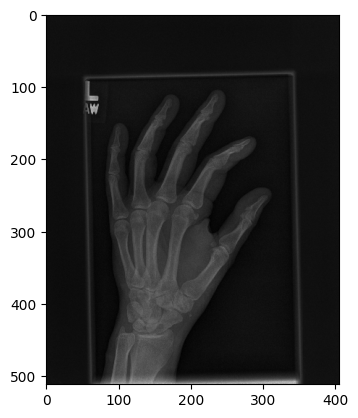

0
[[ 0.47980362 -0.62983245]]


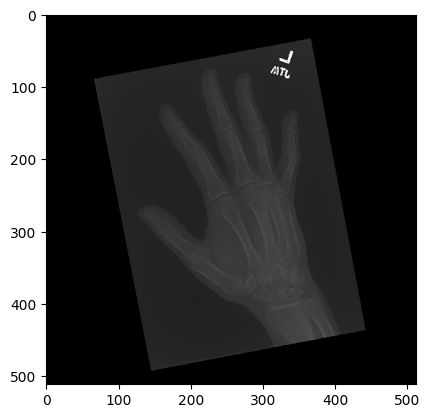

0
[[ 0.4904187 -0.74249  ]]


In [ ]:
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

img1 = Image.open("/content/drive/MyDrive/Colab Notebooks/花岡さん/mura_train_v2/positive/patient00008_image1.png").convert('RGB')
img2 = Image.open("/content/drive/MyDrive/Colab Notebooks/花岡さん/mura_train_v2/negative/patient00050_image1.png").convert('RGB')

# img1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/花岡さん/mura_val_v2/positive/patient11194_image2.png")
# img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# img2 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/花岡さん/mura_val_v2/negative/patient11190_image1.png")
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# # img1_input_image = transform(img1).float().unsqueeze(0).to(DEVICE)
# img1_input_image = transform(img1).unsqueeze(0)
# img2_input_image = transform(image = img2)["image"].float().unsqueeze(0).to(DEVICE)

plt.imshow(img1)
plt.show()
print(model(transform(img1).unsqueeze(0)).detach().numpy().argmax())
print(model(transform(img1).unsqueeze(0)).detach().numpy())
plt.imshow(img2)
plt.show()
print(model(transform(img2).unsqueeze(0)).detach().numpy().argmax())
print(model(transform(img2).unsqueeze(0)).detach().numpy())